In [95]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline


In [96]:
#Init
df = pd.read_json("http://40.118.127.161:8080/history")

df['closed'] = pd.to_datetime(df['closed'], unit='ms')
df['traderId'] = df['traderId'].apply(lambda x: x.split(":")[0])
df.set_index('closed', inplace=True)


# Running Time in Buissness Days

In [97]:
len(df.resample("D").count())

54

# Etorobot Performance Chart

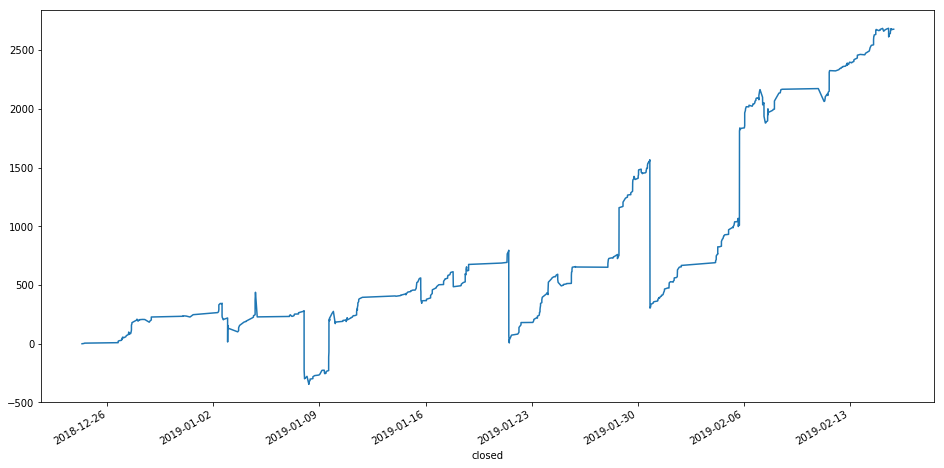

In [98]:
profitList = df["profitInUSD"]
profitList = profitList.reset_index()["profitInUSD"]
totalMarginList = pd.Series(np.random.randn(profitList.size))
for i in range(0, profitList.size):
    totalMarginList[i] = profitList[0:i].sum()
    
#totalMarginResFrame = pd.DataFrame(totalMarginList.values, df.index.values)
df["profit"] = totalMarginList.values
plt.figure(figsize=(16, 8))
df["profit"].plot()

# Profit pro Trader

<BarContainer object of 13 artists>

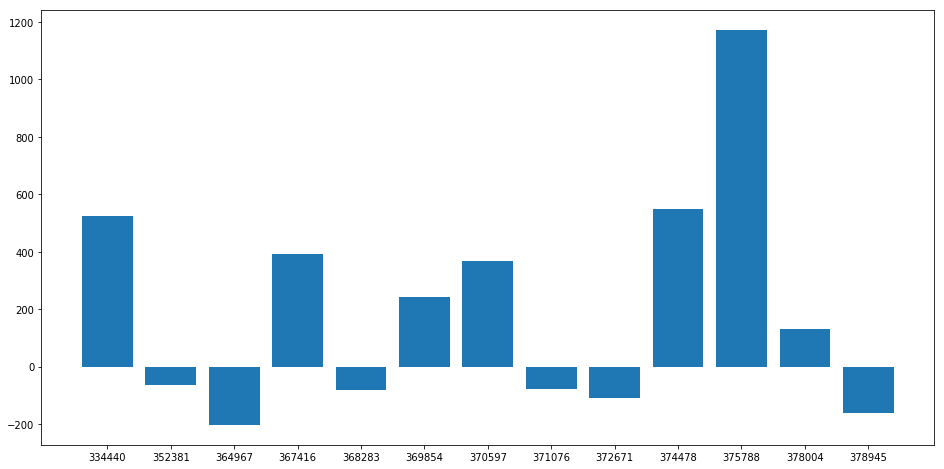

In [99]:

tradersSum = df.groupby("traderId").sum()["profitInUSD"]
plt.figure(figsize=(16, 8))
plt.bar(tradersSum.index, tradersSum.values)

# Possitions count pro Trader

<BarContainer object of 13 artists>

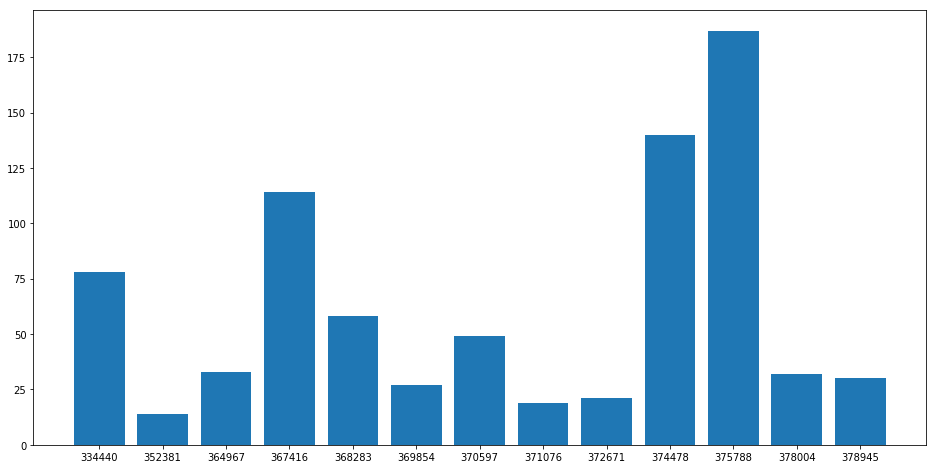

In [100]:
posCount = df.groupby("traderId").count()["name"]
plt.figure(figsize=(16, 8))
plt.bar(posCount.index, posCount.values)


# Position count / Profit (Efficiency Ratio)

<BarContainer object of 13 artists>

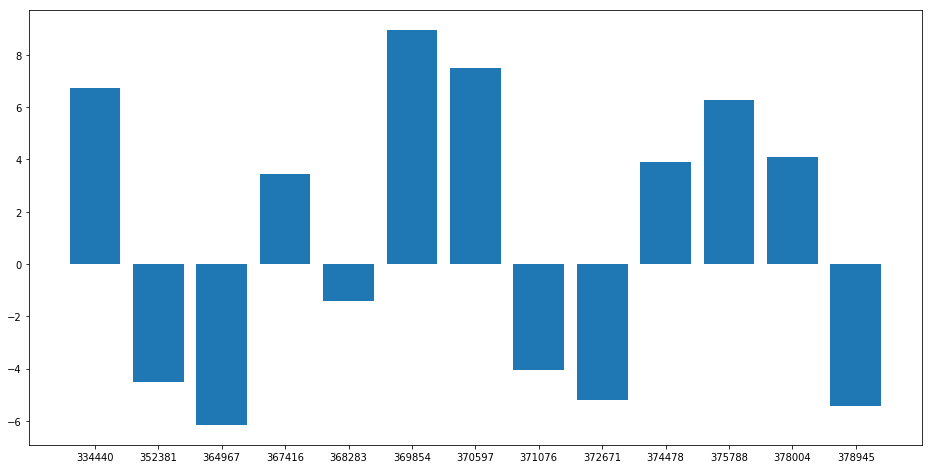

In [101]:
eff = pd.DataFrame(posCount.values, posCount.index)
eff["efficiency"] = (tradersSum.values) / eff[0]
plt.figure(figsize=(16, 8))
plt.bar(posCount.index, eff["efficiency"].values)
